In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y)
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((4367, 50), (1092, 50), (4367,), (1092,))

# Training a Machine learning model

In [5]:
from sklearn.svm import SVC

In [10]:
model = SVC(C=1.0, kernel='rbf', gamma=0.01, probability=True)

In [11]:
model.fit(x_train, y_train)
print('model Trained Successfully')

model Trained Successfully


In [12]:
#score
model.score(x_train,y_train)

0.8571101442637966

In [13]:
model.score(x_test,y_test)

0.8076923076923077

# Model Evaluation
- Confusion Matrix
- Classification Report
- kappa score
- ROC and AUC (probability)

In [14]:
from sklearn import metrics

In [15]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) #probability

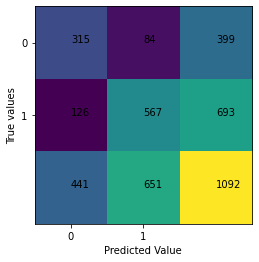

In [23]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm = np.concatenate((cm, cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm, cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j, '%d' %cm[i,j])

plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Value')
plt.ylabel('True values')
plt.show()

In [24]:
#classification report
cr = metrics.classification_report(y_test, y_pred, target_names=['male', 'female'], output_dict= True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.789474,0.714286,0.750000,441.000000
female,0.818182,0.870968,0.843750,651.000000
accuracy,0.807692,0.807692,0.807692,0.807692
macro avg,0.803828,0.792627,0.796875,1092.000000
weighted avg,0.806588,0.807692,0.805889,1092.000000


In [25]:
#kappa score
#if kappa score should be more than 60 means it's a good model
metrics.cohen_kappa_score(y_test, y_pred)

0.594383775351014

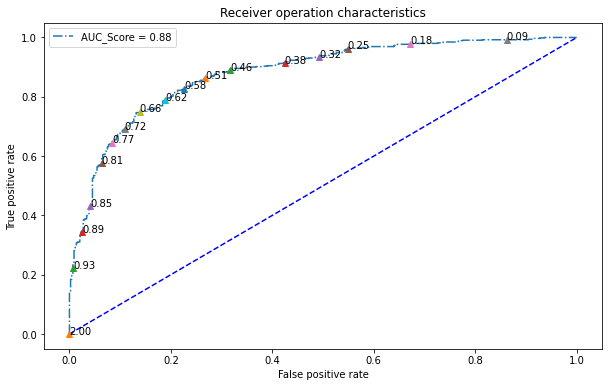

In [34]:
#ROC and AUC
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:,1])
auc_score = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, '-.')
plt.plot([00,1],[0,1], 'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i], tpr[i], '^')
    plt.text(fpr[i], tpr[i], "%0.2f"%thresh[i])
    
plt.legend(['AUC_Score = %0.2f' %auc_score])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operation characteristics')
plt.show()

# Hyper Parameter Tuning

In [35]:
model_tune = SVC()

In [36]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf', 'poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1]
             }

In [44]:
model_grid = GridSearchCV(model_tune, param_grid=param_grid, scoring='accuracy', cv=5,verbose=1)

In [45]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [47]:
model_grid.best_params_

{'C': 1, 'coef0': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [48]:
model_grid.best_score_

0.7816441883811269

In [50]:
#with best parameter buil ML model
model_best = SVC(C=30, kernel='rbf', gamma=0.02, probability=True)

In [51]:
model_best.fit(x_train, y_train)
model_best.score(x_test,y_test)

0.8195970695970696

In [55]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) #probability

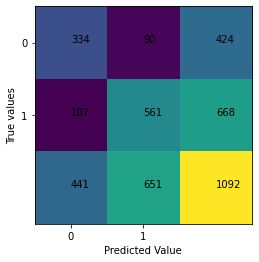

In [56]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm = np.concatenate((cm, cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm, cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j, '%d' %cm[i,j])

plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Value')
plt.ylabel('True values')
plt.show()

In [57]:
#classification report
cr = metrics.classification_report(y_test, y_pred, target_names=['male', 'female'], output_dict= True)
print(pd.DataFrame(cr).T)

              precision    recall  f1-score      support
male           0.787736  0.757370  0.772254   441.000000
female         0.839820  0.861751  0.850644   651.000000
accuracy       0.819597  0.819597  0.819597     0.819597
macro avg      0.813778  0.809560  0.811449  1092.000000
weighted avg   0.818786  0.819597  0.818987  1092.000000


In [58]:
#kappa score
#if kappa score should be more than 60 means it's a good model
print(metrics.cohen_kappa_score(y_test, y_pred))

0.6229942587958193


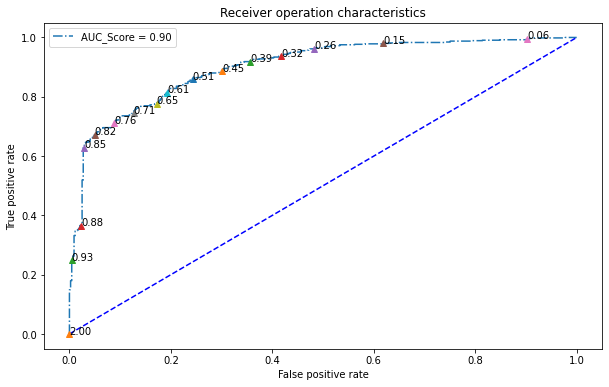

In [59]:
#ROC and AUC
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:,1])
auc_score = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, '-.')
plt.plot([00,1],[0,1], 'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i], tpr[i], '^')
    plt.text(fpr[i], tpr[i], "%0.2f"%thresh[i])
    
plt.legend(['AUC_Score = %0.2f' %auc_score])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operation characteristics')
plt.show()

In [60]:
#save our machine learning model
import pickle

In [61]:
pickle.dump(model_best, open('model_svm.pickle', 'wb'))


In [62]:
pickle.dump(mean, open('./model/mean_preprocess.pickle', 'wb'))